Importing libraries

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Genetic algorithm approach

In [ ]:
loan_size = [10, 25, 4, 11, 18, 3, 17, 15, 9, 10]
interest = [0.021, 0.022, 0.021, 0.027, 0.025, 0.026, 0.023, 0.021, 0.028, 0.022]
rating = ['AAA', 'BB', 'A', 'AA', 'BBB', 'AAA', 'BB', 'AAA', 'A', 'A']
loss = [0.0002, 0.0058, 0.0001, 0.0003, 0.0024, 0.0002, 0.0058, 0.0002, 0.001, 0.001]

D = 60 
K = 0.15
rD = 0.009#given as 0.9%
rT = 0.01
gen = 60
crossover = 0.8
mutation_prob = 0.006
size = 6 #it is given that the roulette wheel is spun 6 times, thus 6 genes in each
N = 10

In [ ]:
def initial_population():
  #generating the initial population
  individual = []
  while(len(individual) < 10):
    individual.append(random.randint(0, 1))
  return individual

In [ ]:
def fitness(individual):
  #evaluating the fitness of the generated chromosomes
  demand_deposit = D*rD #independent of choice of customer
  f = 0
  loan_revenue = 0
  transaction = 0
  losses = 0
  for j in range(N):
    if individual[j] == 1:    
      loan_revenue += interest[j]*loan_size[j] - loss[j]
      transaction += rT*((1-K)*D - loan_size[j])
      losses += loss[j]
  f = loan_revenue + transaction - losses - demand_deposit
  return f

In [ ]:
def check_new_gene(gene):
  loansize = 0
  for m in range(N):
    if gene[m] == 1:
      loansize += loan_size[m]
  return loansize <= (1 - K)*D

In [ ]:
def roulette_wheel(population):
  fitness_population = []   
  for i in range(len(population)):
      fitness_population.append(fitness(population[i]))
  fitness_cumulative = [i/sum(fitness_population)for i in fitness_population]
  for i in range(1,len(fitness_cumulative)):#cumulative fitness
    fitness_cumulative[i] += fitness_cumulative[i-1]

  selected = []

  for i in range(2):
    r = random.random()
    k = 0
    while r > fitness_cumulative[k]:
      k += 1
    if k == 0:
      k = 1
    selected.append(population[k-1])
  return selected

In [ ]:
from copy import deepcopy
def mutation(sol):
    temp = deepcopy(sol)#copying the address so that changes get reflected
    for i in range(len(temp)):
      if random.random() < mutation_prob:
        temp[i]= 1 - temp[i]  # flipping the bit randomly
    return temp

In [ ]:
def single_point_crossover(p1, p2):   
    rr = random.random()
    if rr < crossover:
      p = random.randint(1, len(p1) - 2)#choosing a point for crossover
      c1 = p1[:p] + p2[p:]
      c2 = p2[:p] + p1[p:]
    else:
      c1, c2 = p1, p2
    return c1, c2

In [ ]:
def best_few(population): #function to find the best few based on the reproduction probability
    pop_fitness=[]
    best = []
    no = int(len(population)*0.194) + 1
    for i in range(len(population)):
      j = fitness(population[i])
      pop_fitness.append([j, population[i]])#making pairs of fitness, individual
    pop_fitness = sorted(pop_fitness, reverse=True, key = lambda x : x[0])#sorting in descending order

    for i in range(no):
      best.append(pop_fitness[i][1])
    return best

Maximum fitness Value: 
3.1854
Corresponding solution:
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


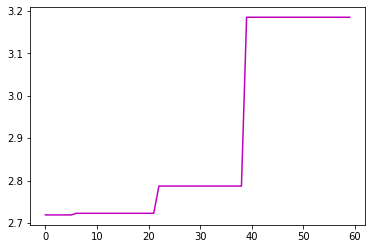

In [ ]:
import random
from copy import deepcopy 
import matplotlib.pyplot as plt   

population = [] # present population

for i in range(60): # generating population
    j = initial_population() 
    while not check_new_gene(j):  # we keep on generating until we get a valid array
      j = initial_population()
    population.append(j) 

max_fitness = []

for i in range(gen):
  pairs = best_few(population) #selecting the best few to remain in the new list as well
  max_fitness.append(fitness(pairs[0]))
  
  while(len(pairs)!= len(population)): 
    parent1,parent2 = roulette_wheel(population) #selection
    child1, child2 = single_point_crossover(parent1,parent2) #crossover

    child1 = mutation(child1) #performing mutation on the genes after crossover
    child2 = mutation(child2)

    while not check_new_gene(child1):#new children that are generated must be valid, and the size of the population must be constant
      child1 = initial_population()
    while not check_new_gene(child2):
      child2 = initial_population()

    pairs.append(child1)
    pairs.append(child2)

  population = pairs

Max_fitness_sol = best_few(population)#finding the top few of the population
print("Maximum fitness Value: ")
print(max_fitness[gen - 1])
print("Corresponding solution:")
print(Max_fitness_sol[0])
plt.plot(range(gen),max_fitness, color = 'm')
plt.show()

In [ ]:
loan_sum = 0
for i in range(0, 10):
  loan_sum += (Max_fitness_sol[0][i])*(loan_size[i])
loan_sum

47

Simulated Annealing approach

In [ ]:
loan_size = [10, 25, 4, 11, 18, 3, 17, 15, 9, 10]
interest = [0.021, 0.022, 0.021, 0.027, 0.025, 0.026, 0.023, 0.021, 0.028, 0.022]
rating = ['AAA', 'BB', 'A', 'AA', 'BBB', 'AAA', 'BB', 'AAA', 'A', 'A']
loss = [0.0002, 0.0058, 0.0001, 0.0003, 0.0024, 0.0002, 0.0058, 0.0002, 0.001, 0.001]

D = 60 #as the value is in millions
K = 0.15
rD = 0.009#given as 0.9%
rT = 0.01

N = len(loan_size)

In [ ]:
def init_sol():
  i = [0]*N
  loansize = 0 #sum of the loan sizes
  for j in range(1, N):
    if random.random() > 0.5:
      i[j] = 1
      loansize += loan_size[j]
  if loansize <= (1 - K)*D:
    return i
  else:
    return init_sol() #continue till we get a feasible solution

In [ ]:
def sa_fitness(sol):
  #evaluating the fitness of the sa function
  demand_deposit = D*rD #independent of choice of customer
  fitness = []
  loan_revenue = 0
  loan_cost = 0
  transaction = 0
  losses = 0
  loansize_sum = 0
  for j in range(N):
    if sol[j] == 1:
      loansize_sum += loan_size[j] #finding the loan size for the selected population
  for j in range(N):
    if sol[j] == 1:    
      loan_revenue += interest[j]*loan_size[j] - loss[j]
      transaction += rT*((1-K)*D - loan_size[j])
      losses += loss[j]
  f = loan_revenue + transaction - losses - demand_deposit
  return f

In [ ]:
sol = init_sol()
fitness = sa_fitness(sol)

best_sol = sol
best_cost = fitness

In [ ]:
def check_new_sol(sol):
  loansize = 0
  for m in range(1, N):
    if sol[m] == 1:
      loansize += loan_size[m]
  if loansize > (1 - K)*D:
    return 1
  else:
    return 0

In [ ]:
def neighbourhood_solution(sol):
  i = random.randint(0, 9)
  if i != 0 and i != 9:
    if random.random() <= 0.5:
      t = sol[i-1]    
      sol[i-1] = sol[i]
      sol[i] = t
    else:
      t = sol[i]
      sol[i] = sol[i+1]
      sol[i+1] = t
  else:
    t = sol[0]
    sol[0] = sol[9]
    sol[9] = t

  if check_new_sol(sol) == 0:
    return sol
  else:
    return neighbourhood_solution(sol)

In [ ]:
solutions = []
cost = []

solutions.append(best_sol)
cost.append(best_cost)

temp0 = 70
alpha = 0.8
temp = 1000
iter = 30

while temp > temp0:
  for i in range(iter):
    neigh = neighbourhood_solution(sol)
    fit = sa_fitness(neigh)

    if fit > best_cost:
      best_cost = fit
      best_sol = sol
    else:
      t = abs(best_cost - fit)/temp
      if random.random() <= t:
        best_cost = fit
        best_sol = neigh
    cost.append(best_cost)
    solutions.append(best_sol)
  temp = alpha*temp

Best solution
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
2.249


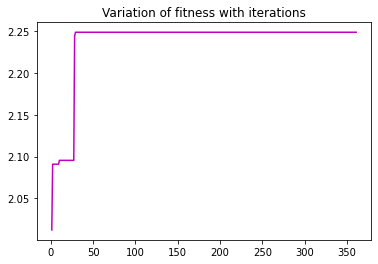

In [ ]:
print("Best solution")
m = max(cost)
ind = cost.index(m)
sol_ans = solutions[ind]
cost_ans = cost[ind]

print(sol_ans)
print(cost_ans)

plt.plot(range(1, len(solutions) + 1), cost, c = 'm')
plt.title("Variation of fitness with iterations")
plt.show()

In [ ]:
loan_sum = 0
for i in range(0, 10):
  loan_sum += (sol_ans[i])*(loan_size[i])
loan_sum

39

Using taboo list

Maximum fitness Value: 
3.1854
Corresponding solution:
[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]


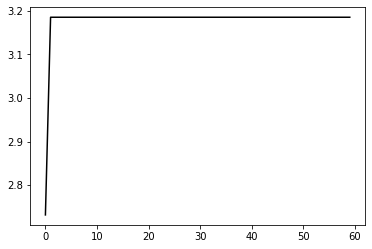

In [ ]:
import random
from copy import deepcopy 
import matplotlib.pyplot as plt   

population = [] # present population
taboo = []

for i in range(60): # generating population
    j = initial_population() 
    while not check_new_gene(j):  # we keep on generating until we get a valid array
      j = initial_population()
    population.append(j) 

max_fitness = []

for i in range(gen):
  for i in population:
    taboo.append(i)

  pairs = best_few(population) #selecting the best few to remain in the new list as well
  max_fitness.append(fitness(pairs[0]))
  
  while(len(pairs)!= len(population)): 
    parent1,parent2 = roulette_wheel(population) #selection
    c1, c2 = single_point_crossover(parent1,parent2) #crossover

    c1 = mutation(c1) #mutation
    c2 = mutation(c2)

    while check_new_gene(c1) == 0 or c1 in taboo == True:
        c1 = initial_population()
    while check_new_gene(c2) == 0 or c2 in taboo == True:
        c2 = initial_population()

    pairs.append(c1)
    pairs.append(c2)
    taboo.append(c1)
    taboo.append(c2)

  population = pairs

Max_fitness_sol = best_few(population)
print("Maximum fitness Value: ")
print(max_fitness[gen - 1])
print("Corresponding solution:")
print(Max_fitness_sol[0])
plt.plot(range(gen),max_fitness, color='k')
plt.show()